# Mass Shooting data
Questions we seek to investigate:

- In which state do the highest/lowest number of mass shootings occur? -> Map
- Which day of the week has the highest number of shootings occcured? -> Bar
- What proportion of the mass shootings were performed by shooters with suspected mental illness? -> Pie
- Are there any identifiable trends in motive? 
- What conclusions can we draw regarding shooters' race/gender? -> correlation?
- Did the military experience result in a higher number of victims? -> line
- Are there any relationships between attributes of the shooter ie age, gender, race, mental health
- How frequently are they occuring?


- Is there a relationship between type of weapon used vs number of fatalities?

HYPOTHESIS

- We hypothesise that a greater number of mass shootings will occur as a result of the shooter suffering from suspected mental illness rather than being motivated by race.

- The younger the age of the shooter, the more likely their incident occurred at a school.


In [9]:
#import dependencies
import pandas as pd
#import numpy as np
#import datetime as dt
from pathlib import Path
%matplotlib inline

#Read Mass Shooting Data
big_shoot = Path("big_shoot.csv")
big_shoot_df = pd.read_csv(big_shoot)

In [10]:
#Display full column set
pd.set_option('display.max_columns', None)

big_shoot_df.head(2)

CaseID                          Title       Location    City    State  \
0       1  University of Texas at Austin  Austin, Texas  Austin    Texas   
1       2     Rose-Mar College of Beauty  Mesa, Arizona    Mesa  Arizona   

    Latitude   Longitude  Number of Civilian Fatalities  \
0  30.198887  -97.844159                             15   
1  33.422687 -111.816320                              5   

   Number of Civilian Injured  Number of Enforcement Fatalities  \
0                          32                                 1   
1                           1                                 0   

   Number of Enforcement Injured  Total Number of Fatalities  \
0                              0                          16   
1                              0                           5   

   Total Number of Victims                                        Description  \
0                       48  On August 1, 1966, a 25-year-old engineering s...   
1                        6  On November 12, 1966, an 18-year-old high scho...   

         Date Day of Week              Date - Detailed           Shooter Name  \
0    8/1/1966      Monday      Monday, August 01, 1966     Charles S. Whitman   
1  11/12/1966    Saturday  Saturday, November 12, 1966  Robert Benjamin Smith   

  Number of shooters Shooter Age(s) Average Shooter Age Shooter Sex  \
0                  1             25                  25        Male   
1                  1             18                  18        Male   

                          Shooter Race  \
0  White American or European American   
1  White American or European American   

                              Type of Gun - Detailed Type of Gun - General  \
0  Remington 700 ADL (6mm), Universal M1 carbine,...         Multiple guns   
1                                 .22 caliber pistol               Handgun   

  Number of Shotguns Number of Rifles Number of Handguns Total Number of Guns  \
0                  1                3                  3                    7   
1                  0                0                  1                    1   

  Number of Automatic Guns Number of Semi-Automatic Guns  \
0                        0                             1   
1                        0                             0   

  Fate of Shooter at the scene Fate of Shooter Shooter's Cause of Death  \
0                     Deceased        Deceased                   Killed   
1                      Custody         Custody           Not applicable   

  School Related                          Place Type  \
0            Yes  College/University/Adult education   
1            Yes  College/University/Adult education   

  Relationship to Incident Location  \
0                Place of schooling   
1                              None   

                        Targeted Victim/s - Detailed  \
0            Family, students, teachers,  and police   
1  Four beauty school students, one client, and h...   

   Targeted Victim/s - General  \
0               General public   
1  Students/Classmates/Teacher   

                          Possible Motive - Detailed  \
0  A task force of professionals known as the Con...   
1  When he was being arrested, the shooter announ...   

  Possible Motive - General  \
0            Mental illness   
1            Mental illness   

                History of Mental Illness - Detailed  \
0  Shooter had visited  a psychiatrist and severa...   
1   Diagnosed as schizophrenic. Possible psychopathy   

  History of Mental Illness - General  \
0                                 Yes   
1                                 Yes   

                                       Data Source 1  \
0       http://en.wikipedia.org/wiki/Charles_Whitman   
1  "Slaughter In The College Of Beauty." Time 88....   

                                  Data Source 2  \
0  Lexington Examiner (KY) - September 23, 2012   
1        Section: Lexington True Crime Examiner   

                                       Data Sour

In [15]:
#Drop unnecessary columns
big_shoot_df.drop(['Latitude', 'Longitude', 'Type of Gun - Detailed', 'Type of Gun - General', 'Number of Rifles', 'Number of Handguns', 'Number of Shotguns', 'Number of Automatic Guns', 'Number of Semi-Automatic Guns', 'Data Source 1', 'Data Source 2', 'Data Source 3', 'Data Source 4', 'Data Source 5', 'Data Source 6', 'Data Source 7', 'Class', 'Depreciation', 'Notes', 'Edit Date'], axis=1, inplace=True)

KeyError: "['Latitude' 'Longitude' 'Type of Gun - Detailed' 'Type of Gun - General'\n 'Number of Rifles' 'Number of Handguns' 'Number of Shotguns'\n 'Number of Automatic Guns' 'Number of Semi-Automatic Guns'\n 'Data Source 1' 'Data Source 2' 'Data Source 3' 'Data Source 4'\n 'Data Source 5' 'Data Source 6' 'Data Source 7' 'Class' 'Depreciation'\n 'Notes' 'Edit Date'] not found in axis"

In [18]:
#Follow-Up clean
big_shoot_df.drop(['Number of Civilian Fatalities', 'Number of Civilian Injured', 'Number of Enforcement Fatalities', 'Number of Enforcement Injured', 'Average Shooter Age', 'Shooter Sex', 'Fate of Shooter at the scene'], axis=1, inplace=True)

In [25]:
#Dropped More unecessary columns 
#big_shoot_df.drop(['Number of Civilian Fatalities', 'Number of Civilian Injured', 'Number of Enforcement Fatalities', 'Number of Enforcement Injured', 'Shooter Age(s)', 'Number of Shotguns', 'Number of Rifles', 'Number of Handguns', 'Number of Automatic Guns', 'Number of Semi-Automatic Guns', 'Fate of Shooter at the scene', 'Data Source 1', 'Data Source 2', 'Data Source 3', 'Data Source 4', 'Data Source 5', 'Data Source 6', 'Data Source 7', 'Class', 'Depreciation', 'Notes', 'Edit Date'], axis=1, inplace=True)
            

#Display data
booleans = []
for location in big_shoot_df['School Related']:
    if location == 'Yes':
        booleans.append(True)
    else:
        booleans.append(False)
        
shooting_location = pd.Series(booleans)

big_shoot_df[shooting_location]
#big_shoot_df['Shooter Age(s)']


CaseID                                            Title  \
0         1                    University of Texas at Austin   
1         2                       Rose-Mar College of Beauty   
3         4                   Clara Barton Elementary School   
4         5                                Olean High School   
5         6             Los Angeles Computer Learning Center   
..      ...                                              ...   
176     181                                      Chapel Hill   
221     231                         Umpqua Community College   
222     232  Northern Arizona University at Flagstaff Campus   
269     279                         Michigan school shooting   
325     335                        Graduation party drive by   

                        Location              City           State   Latitude  \
0                  Austin, Texas            Austin           Texas  30.198887   
1                  Mesa, Arizona              Mesa         Arizona  33.422687   
3              Chicago, Illinois           Chicago        Illinois  41.839280   
4                Olean, New York             Olean        New York  42.081854   
5        Los Angeles, California       Los Angeles      California  34.176221   
..                           ...               ...             ...        ...   
176  Chapel Hill, North Carolina       Chapel Hill  North Carolina  35.926815   
221             Roseburg, Oregon          Roseburg          Oregon  43.222056   
222           Flagstaff, Arizona         Flagstaff         Arizona  35.172566   
269   Muskegon Heights, Michigan  Muskegon Heights        Michigan  43.201126   
325             Jackson, Georgia           Jackson         Georgia  33.294565   

      Longitude  Total Number of Fatalities  Total Number of Victims  \
0    -97.844159                          16                       48   
1   -111.816320                           5                        6   
3    -87.688181                           1                        4   
4    -78.432139                           3                       10   
5   -118.539954                           1                        8   
..          ...                         ...                      ...   
176  -79.038504                           3                        3   
221 -123.352237                          10                       16   
222 -111.658543                           1                        4   
269  -86.238946                           0                        3   
325  -83.966021                           1                        4   

                                           Description        Date  \
0    On August 1, 1966, a 25-year-old engineering s...    8/1/1966   
1    On November 12, 1966, an 18-year-old high scho...  11/12/1966   
3    On January 17, 1974, a 14-year-old student ent...   1/17/1974   
4    On December 30, 1974, a 17-year-old honor stud...  12/30/1974   
5    On February 19, 1976, a 18-year-old student at...   2/19/1976   
..                                                 ...         ...   
176  On the evening of Feb. 10, 2015, a man entered...   2/10/2015   
221  On Monday of October 1, 2015, a gunman opened ...   10/1/2015   
222  On Friday of October 9, 2015, one person is de...   10/9/2015   
269  Shooter was a part of a fight outside of a hig...    2/9/2016   
325  Graduation party with over 200 people was fire...   5/18/2016   

    Day of Week              Date - Detailed  \
0        Monday      Monday, August 01, 1966   
1      Saturday  Saturday, November 12, 1966   
3      Thursday   Thursday, January 17, 1974   
4        Monday    Monday, December 30, 1974   
5      Thursday  Thursday, February 19, 1976   
..          ...                          ...   
176     Tuesday   Tuesday, February 10, 2015   
221    Thursday    Thursday, October 1, 2015   
222      Friday      Friday, October 9, 2015   
269     Tuesday   Tuesday, February 09, 2016   
325   Wednesday      Wednesda

In [41]:
shootings_per_location = big_shoot_df.groupby('Location')['Total Number of Victims'].sum()
most_shootings = shootings_per_location.sort_values(ascending=False)
most_shootings

Location
Orlando, Florida              114
Killeen, Texas                 71
Denver, Colorado               70
Austin, Texas                  52
Blacksburg, Virginia           49
                             ... 
Caroline, Virginia              3
Sparks, Nevada                  3
Pinellas Park, Florida          3
Monroeville, Pennsylvania       3
Muskegon Heights, Michigan      3
Name: Total Number of Victims, Length: 257, dtype: int64

<AxesSubplot:title={'center':'Top 5 Most Dangerous Locations'}, xlabel='Location'>

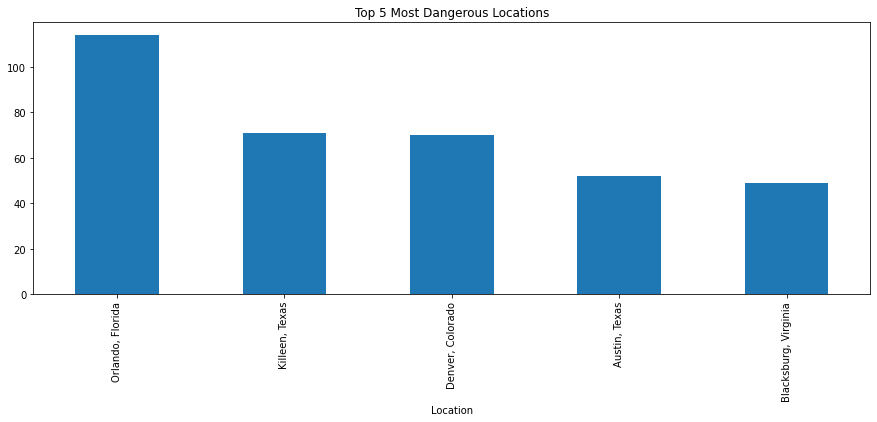

In [44]:
most_shootings.head(5).plot(kind='bar',x='Location',y='Total Number of Victims',figsize=(15,5), title = "Top 5 Most Dangerous Locations")